In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='jshtml')
import seaborn as sns

#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=2.2)

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Problema 1

<font size=3px>Um motorista dirigindo com uma velocidade constante de 45,0 m/s passa sem perceber por um bloqueio da polícia.<br>
Um segundo após a passagem do carro, a polícia sai em perseguição a ele,com uma aceleração constante de 3,00 m/s$^2$. <br>
Depois de quanto tempo o policial alcança o carro perseguido?</font>

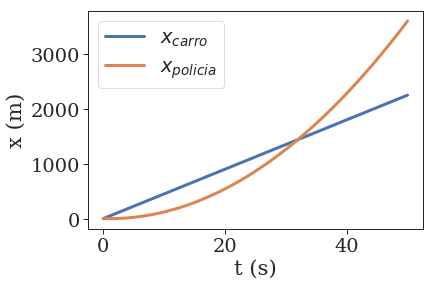

In [52]:
fig = plt.figure()
tC0, xC0, vC0, aC = 0.,0.,45., 0.
xC = lambda t: xC0 + vC0*(t-tC0)  + aC*t**2/2

tP0,xP0,vP0,aP = 1.,0.,0.,3.
xP = lambda t: xP0 + vP0*(t-tP0) + aP*(t-tP0)**2/2 if t >1. else 0.


tpts = np.linspace(0.,50.,100)
xPpts = [xP(t) for t in tpts]
plt.plot(tpts,xC(tpts),linewidth=3)
plt.plot(tpts,xPpts,linewidth=3)
plt.xlabel(r't (s)')
plt.ylabel(r'x (m)')
leg = plt.legend([r'$x_{carro}$',r'$x_{policia}$'])

## Problema 2

<font size=3px>Um projétil é atirado em direção a um plano inclinado como mostra figura abaixo. A velocidade inicial tem módulo $v_i$ e faz um ângulo $\theta_i$ com a horizontal. O plano possui inclinação
$\phi$ e a aceleração da gravidade tem módulo $g$. Mostre que o projétil percorre uma distância $d$
ao longo do plano inclinado dada por:<br><br>
$$
d = \frac{2 v_i^2 \cos \theta_i \sin (\theta_i -\phi)}{g \cos^2 \phi}
$$
</font>
<img src="FS_01.png" alt="Drawing" style="width: 400px;"/>

Resposta= 3.48 m


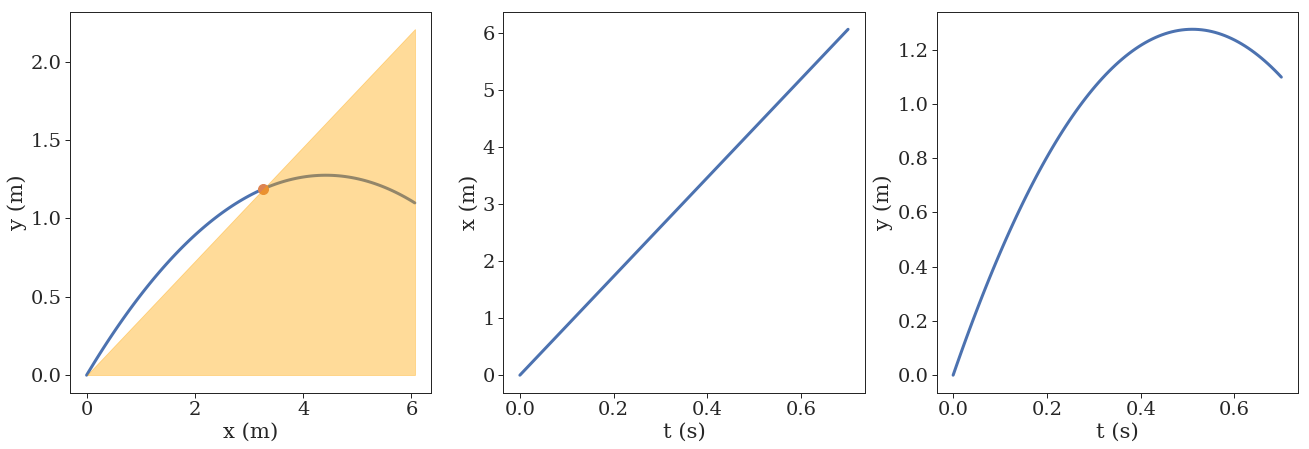

In [75]:
fig = plt.figure(figsize=(22,7))
thetai = 30.*np.pi/180.
vi = 10.
v0x = vi*np.cos(thetai)
v0y = vi*np.sin(thetai)
t0,x0,y0 = 0.,0.,0.
g = 9.8
xF = lambda t: x0 + v0x*(t-t0)
yF = lambda t: y0 + v0y*(t-t0) - g*((t-t0)**2)/2.

phi = 20.*np.pi/180.
lF = lambda x: x*np.tan(phi)

d = (2*vi**2*np.cos(thetai)*np.sin(thetai-phi)/(g*(np.cos(phi)**2)))
xd = d*np.cos(phi)
yd = d*np.sin(phi)

tpts = np.linspace(0.,0.7,100)
ax1 = plt.subplot(131)
ax1.plot(xF(tpts),yF(tpts),linewidth=3)
ax1.fill([xF(tpts).min(),xF(tpts).max(),xF(tpts).max()],
         [lF(xF(tpts).min()),lF(xF(tpts).min()),lF(xF(tpts).max())],zorder=10,alpha=0.4,c='orange')
ax1.plot(xd,yd,'o',markersize=10)
ax1.set_xlabel(r'x (m)')
ax1.set_ylabel(r'y (m)')
ax2 = plt.subplot(132)
ax2.plot(tpts,xF(tpts),linewidth=3)
ax2.set_xlabel(r't (s)')
ax2.set_ylabel(r'x (m)')
ax3 = plt.subplot(133)
ax3.plot(tpts,yF(tpts),linewidth=3)
ax3.set_xlabel(r't (s)')
ax3.set_ylabel(r'y (m)')
print('Resposta= %.2f m' %d)

### Problema 3

<font size=3px>
Uma bola é arremessada com velocidade inicial $v_i = 30,0$ m/s com um ângulo de $45^{\circ}$ com relação à horizontal. 
A bola está a 1,2 m acima do solo no momento do arremesso e existe um muro de 10 m de altura à uma distância de 80 m do arremessador.
<br> a) Determine o vetor velocidade inicial ($\vec{v}_i$)
<br> b) Determine o alcance horizontal da bola.
<br> c) A bola consegue passar por cima do muro?
<br> d) Assumindo que o ângulo de arremesso não se altera, qual a velocidade mínima para que a bola caia do outro lado do muro?
</font>

In [16]:
fig = plt.figure(figsize=(22,7))
thetai = 45.*np.pi/180.
vi = 30.
v0x = vi*np.cos(thetai)
v0y = vi*np.sin(thetai)
t0,x0,y0 = 0.,0.,1.2
g = 9.8
xF = lambda t: x0 + v0x*(t-t0)
yF = lambda t: y0 + v0y*(t-t0) - g*((t-t0)**2)/2.
tmin,tmax = t0,5.
tpts = np.linspace(tmin,tmax,100)
dt = 0.1

ax1 = plt.subplot(131)
line1, = ax1.plot(xF(tpts),yF(tpts),'--',linewidth=3)
ax1.plot([80.,80.],[0.,10.],linewidth=5)
ax1.set_xlabel(r'x (m)')
ax1.set_ylabel(r'y (m)')
ax1.set_ylim(0.,yF(tpts).max()*1.1)
text = ax1.text(1., yF(tpts).max(), r'$v_i = %1.2f$ m/s' %vi)
ax2 = plt.subplot(132)
line2, = ax2.plot(tpts,xF(tpts),'--',linewidth=3)
ax2.set_xlabel(r't (s)')
ax2.set_ylabel(r'x (m)')
ax3 = plt.subplot(133)
line3, = ax3.plot(tpts,yF(tpts),'--',linewidth=3)
ax3.set_xlabel(r't (s)')
ax3.set_ylabel(r'y (m)')
ax3.set_ylim(0.,yF(tpts).max()*1.1)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


def init():
    line1.set_data(xF(tpts),yF(tpts))
    line2.set_data(tpts,xF(tpts))
    line3.set_data(tpts,yF(tpts))
    text.set_text(r'$v_i = %1.2f$ m/s' %vi)
    return (line1,line2,line3,text)
def animate(i):
    vi = 30.-float(i)/30.
    v0x = vi*np.cos(thetai)
    v0y = vi*np.sin(thetai)
    xF = lambda t: x0 + v0x*(t-t0)
    yF = lambda t: y0 + v0y*(t-t0) - g*((t-t0)**2)/2.
    line1.set_data(xF(tpts),yF(tpts))
    line2.set_data(tpts,xF(tpts))
    line3.set_data(tpts,yF(tpts))
    text.set_text(r'$v_i = %1.2f$ m/s' %vi)
    return (line1,line2,line3,text)


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int((tmax-tmin)/dt), interval=150, 
                               blit=True)
plt.close()
anim